Let us start with a model which has two unknown parameter $H_0$ and $A$. The distance modulus $\mu$ is defined using luminosity distance in the following manner.
$$D_L(z,H_0,A)=\frac{1+z}{H_0}+A$$
$$\boxed{\mu(z,H_0,A)=5\log_{10}(D_L(z,H_0,A))+25}$$

In [14]:
import numpy as np
import matplotlib.pyplot as plt
# 1. Define the model
def mu_model(z, H0, A):
    """
    A simplified linear model for luminosity distance.
    Not cosmologically accurate, but good for demonstration.
    
    DL = (1+z)/H0 + A
    mu = 5 * log10(DL) + 25
    """
    DL = (1 + z) / H0 + A
    return 5 * np.log10(DL) + 25

Define the derivatives
$$\frac{\partial \mu}{\partial H_0}=5\frac{1}{D_L\ln(10)}\frac{1+z}{-H_0^2}$$
$$\frac{\partial \mu}{\partial A}=5\frac{1}{D_L\ln(10)}$$

In [2]:
def dmu_dH0(z, H0, A):
    """Partial derivative of mu with respect to H0."""
    DL = (1 + z) / H0 + A
    return 5 / (DL * np.log(10)) * (-(1 + z) / H0**2)

def dmu_dA(z, H0, A):
    """Partial derivative of mu with respect to A."""
    DL = (1 + z) / H0 + A
    return 5 / (DL * np.log(10)) * 1

Create mock data (in a real scenario, this would be observational data)

In [9]:
z_data = np.linspace(0.1, 1.0, 50) #creates an array of 50 evenly spaced numbers between 0.1 and 1.0
sigma = 0.05  # A constant uncertainty for all data points

# 4. Set the fiducial (best-fit) parameters
H0_fid = 70.0
A_fid = 0.5
fiducial_params = [H0_fid, A_fid]

print('z=',z_data)

z= [0.1        0.11836735 0.13673469 0.15510204 0.17346939 0.19183673
 0.21020408 0.22857143 0.24693878 0.26530612 0.28367347 0.30204082
 0.32040816 0.33877551 0.35714286 0.3755102  0.39387755 0.4122449
 0.43061224 0.44897959 0.46734694 0.48571429 0.50408163 0.52244898
 0.54081633 0.55918367 0.57755102 0.59591837 0.61428571 0.63265306
 0.65102041 0.66938776 0.6877551  0.70612245 0.7244898  0.74285714
 0.76122449 0.77959184 0.79795918 0.81632653 0.83469388 0.85306122
 0.87142857 0.88979592 0.90816327 0.92653061 0.94489796 0.96326531
 0.98163265 1.        ]


Build the Fisher matrix
 The Fisher matrix F is defined as:
$$F_{ij} = \sum_n \frac{1}{\sigma_n^2}\frac{\partial\mu(z_n,\theta)}{\partial\theta_i} \frac{\partial\mu(z_n,\theta)}{\partial\theta_j}$$

In [12]:
fisher_matrix = np.zeros((2, 2))

for z_i in z_data:
    # Calculate the derivatives at the fiducial parameters
    deriv_H0 = dmu_dH0(z_i, H0_fid, A_fid)
    deriv_A = dmu_dA(z_i, H0_fid, A_fid)
    
    # Fill the Fisher matrix using the derivatives
    derivatives = np.array([deriv_H0, deriv_A])
    outer_product = np.outer(derivatives, derivatives)
    fisher_matrix += (1 / sigma**2) * outer_product

# 6. Calculate the covariance matrix and parameter uncertainties
covariance_matrix = np.linalg.inv(fisher_matrix)
param_uncertainties = np.sqrt(np.diag(covariance_matrix))

Print the results

In [5]:
print("Fiducial parameters:")
print(f"H0: {H0_fid}")
print(f"A: {A_fid}\n")

print("Fisher Matrix:")
print(fisher_matrix, '\n')

print("Covariance Matrix (Inverse of Fisher Matrix):")
print(covariance_matrix, '\n')

print("1-sigma uncertainties from Fisher matrix:")
print(f"ΔH0 = {param_uncertainties[0]:.4f}")
print(f"ΔA = {param_uncertainties[1]:.4f}")

Fiducial parameters:
H0: 70.0
A: 0.5

Fisher Matrix:
[[ 3.54585338e-02 -1.09165541e+02]
 [-1.09165541e+02  3.45962055e+05]] 

Covariance Matrix (Inverse of Fisher Matrix):
[[9.87921496e+02 3.11730675e-01]
 [3.11730675e-01 1.01254595e-04]] 

1-sigma uncertainties from Fisher matrix:
ΔH0 = 31.4312
ΔA = 0.0101


In essence, our result is a forecast that with the specified data and model, we would be able to measure the Hubble constant to be your fiducial value with an uncertainty of 31. The full result would be expressed as $H_0=70±31$ (assuming a fiducial value of $70$). The large uncertainty of $31$ suggests that our planned experiment is not very sensitive to this parameter. Therefore, it is better to measure the value of $H_0$ and $A$ by using an instrument that measures observables other than $\mu$ or we could make our instrument more sensitive by decreasing the value of $\sigma$.

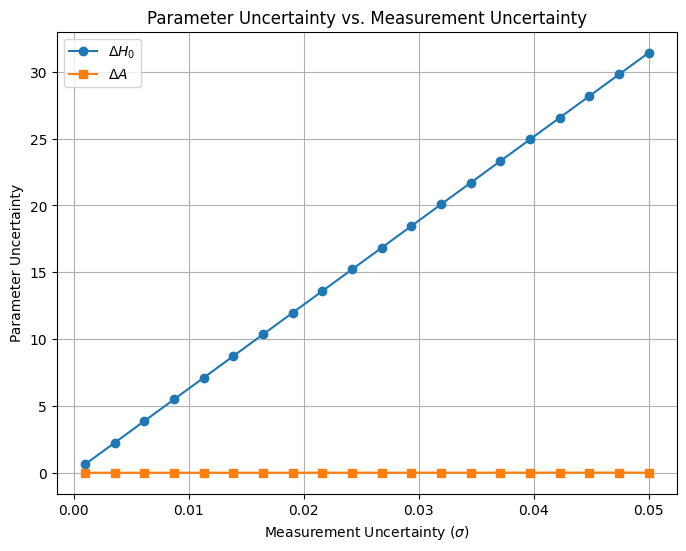

----------------------------------------------------------------
Results Summary:
For sigma = 0.0500, ΔH0 = 31.4312, ΔA = 0.0101
For sigma = 0.0010, ΔH0 = 0.6286, ΔA = 0.0002
----------------------------------------------------------------


In [19]:
def analyze_uncertainty_vs_sigma(sigmas):
    """
    Calculates and plots parameter uncertainties for a range of sigma values.
    
    Args:
        sigmas (list or np.array): A list of different sigma values to test.
    
    Returns:
        tuple: A tuple containing lists of calculated H0 and A uncertainties.
    """

    z_data = np.linspace(0.1, 1.0, 50)
    H0_fid = 70.0
    A_fid = 0.5
    
    uncertainties_H0 = []
    uncertainties_A = []

    for sigma in sigmas:
        # Build the Fisher matrix for the current sigma
        fisher_matrix = np.zeros((2, 2))
        for z_i in z_data:
            deriv_H0 = dmu_dH0(z_i, H0_fid, A_fid)
            deriv_A = dmu_dA(z_i, H0_fid, A_fid)
            derivatives = np.array([deriv_H0, deriv_A])
            outer_product = np.outer(derivatives, derivatives)
            fisher_matrix += (1 / sigma**2) * outer_product

        # Calculate the covariance and uncertainties
        covariance_matrix = np.linalg.inv(fisher_matrix)
        param_uncertainties = np.sqrt(np.diag(covariance_matrix))
        
        uncertainties_H0.append(param_uncertainties[0])
        uncertainties_A.append(param_uncertainties[1])

    # Plot the results
    plt.figure(figsize=(8, 6))
    plt.plot(sigmas, uncertainties_H0, 'o-', label=r'$\Delta H_0$')
    plt.plot(sigmas, uncertainties_A, 's-', label=r'$\Delta A$')
    plt.xlabel(r'Measurement Uncertainty ($\sigma$)')
    plt.ylabel('Parameter Uncertainty')
    plt.title('Parameter Uncertainty vs. Measurement Uncertainty')
    plt.legend()
    plt.grid(True)
    plt.show()

    return uncertainties_H0, uncertainties_A

# Example usage of the new function
test_sigmas = np.linspace(0.05, 0.001, 20)
h0_err, a_err = analyze_uncertainty_vs_sigma(test_sigmas)

print("----------------------------------------------------------------")
print("Results Summary:")
print(f"For sigma = {test_sigmas[0]:.4f}, ΔH0 = {h0_err[0]:.4f}, ΔA = {a_err[0]:.4f}")
print(f"For sigma = {test_sigmas[-1]:.4f}, ΔH0 = {h0_err[-1]:.4f}, ΔA = {a_err[-1]:.4f}")
print("----------------------------------------------------------------")